In [1]:
import heeps
from heeps.util.psf_template import psf_template
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. L-band APP

In [2]:
conf = dict(
    hfov = 2.13,
    mode = 'APP',
    band = 'L',
    f_phase = 'wavefront/cfull/cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits',
    avg = True,
    nframes_avg = 100,
)
conf = heeps.config.read_config(**conf)
conf = heeps.config.update_config(**conf, verbose=True)
wf = heeps.pupil.pupil(**conf, verbose=True)
verbose = False

Simulation config: band=L, mode=APP
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=2.13 arcsec (-> ndet=779, 100.02 lam/D)

Entrance pupil: loaded from 'ELT_fullM1.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾


### IMG old design

   2022-07-24 14:56:13, e2e simulation using 56 cores
   2022-07-24 14:56:25, completed in 11.37 seconds
off-axis PSF: fwhm=3.6pix, PSF flux=0.228, PSF max=0.031

   2022-07-24 14:56:27, e2e simulation using 56 cores
   2022-07-24 14:56:39, completed in 12.02 seconds
on-axis PSF: fwhm=3.6pix, PSF flux=0.152, PSF max=0.020

flux Strehl=66.45%, peak Strehl=64.81%


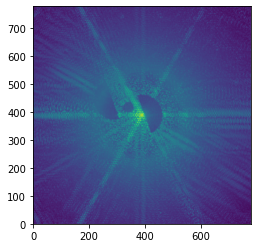

In [3]:
conf['f_app_amp'] = conf['dir_input'] + 'optics/app/METIS_IMG_L_amp.fits'
conf['f_app_phase'] = conf['dir_input'] + 'optics/app/METIS_IMG_L_phase.fits'
psf = heeps.wavefront.propagate(wf, onaxis=False, verbose=verbose, **conf)
psf_crop, fwhm, ap_flux = psf_template(psf)
ap_flux_OFF = ap_flux
peak_OFF = np.max(psf_crop)
print('off-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
psf = heeps.wavefront.propagate(wf, onaxis=True, verbose=verbose, **conf)
plt.imshow(np.log10(psf), origin='lower');
psf_crop, fwhm, ap_flux = psf_template(psf)
print('on-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
print('flux Strehl=%.2f%%, peak Strehl=%.2f%%'%(ap_flux/ap_flux_OFF*100, np.max(psf_crop)/peak_OFF*100))

### IMG new design (ROF)

   2022-07-24 14:56:43, e2e simulation using 56 cores
   2022-07-24 14:56:56, completed in 13.52 seconds
off-axis PSF: fwhm=3.6pix, PSF flux=0.228, PSF max=0.031

   2022-07-24 14:57:00, e2e simulation using 56 cores
   2022-07-24 14:57:15, completed in 15.22 seconds
on-axis PSF: fwhm=3.6pix, PSF flux=0.142, PSF max=0.019

flux Strehl=62.30%, peak Strehl=60.71%


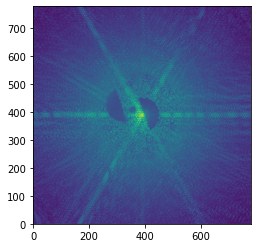

In [4]:
conf['f_app_amp'] = conf['dir_input'] + 'optics/app/METIS_IMG_L_amp_ROF.fits'
conf['f_app_phase'] = conf['dir_input'] + 'optics/app/METIS_IMG_L_phase_ROF.fits'
psf = heeps.wavefront.propagate(wf, onaxis=False, verbose=verbose, **conf)
psf_crop, fwhm, ap_flux = psf_template(psf)
ap_flux_OFF = ap_flux
peak_OFF = np.max(psf_crop)
print('off-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
psf = heeps.wavefront.propagate(wf, onaxis=True, verbose=verbose, **conf)
plt.imshow(np.log10(psf), origin='lower');
psf_crop, fwhm, ap_flux = psf_template(psf)
print('on-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
print('flux Strehl=%.2f%%, peak Strehl=%.2f%%'%(ap_flux/ap_flux_OFF*100, np.max(psf_crop)/peak_OFF*100))

### LMS

   2022-07-24 14:57:20, e2e simulation using 56 cores
   2022-07-24 14:57:34, completed in 14.06 seconds
off-axis PSF: fwhm=3.6pix, PSF flux=0.232, PSF max=0.031

   2022-07-24 14:57:39, e2e simulation using 56 cores
   2022-07-24 14:57:55, completed in 15.61 seconds
on-axis PSF: fwhm=3.6pix, PSF flux=0.151, PSF max=0.020

flux Strehl=65.25%, peak Strehl=63.75%


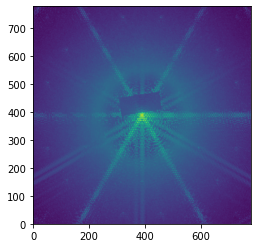

In [5]:
conf['f_app_amp'] = conf['dir_input'] + 'optics/app/METIS_LMS_L_amp.fits'
conf['f_app_phase'] = conf['dir_input'] + 'optics/app/METIS_LMS_L_phase.fits'
psf = heeps.wavefront.propagate(wf, onaxis=False, verbose=verbose, **conf)
psf_crop, fwhm, ap_flux = psf_template(psf)
ap_flux_OFF = ap_flux
peak_OFF = np.max(psf_crop)
print('off-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
psf = heeps.wavefront.propagate(wf, onaxis=True, verbose=verbose, **conf)
psf_crop, fwhm, ap_flux = psf_template(psf)
plt.imshow(np.log10(psf), origin='lower');
print('on-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
print('flux Strehl=%.2f%%, peak Strehl=%.2f%%'%(ap_flux/ap_flux_OFF*100, np.max(psf_crop)/peak_OFF*100))

# 2. M-band APP

In [6]:
conf = dict(
    hfov = 2.13,
    mode = 'APP',
    band = 'M',
    f_phase = 'wavefront/cfull/cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits',
    avg = True,
    nframes_avg = 100,
)
conf = heeps.config.read_config(**conf)
conf = heeps.config.update_config(**conf, verbose=True)
wf = heeps.pupil.pupil(**conf, verbose=True)
verbose = False

Simulation config: band=M, mode=APP
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=227, pscale=5.4700 mas, lam=4.7850E-06 m
   hfov=2.13 arcsec (-> ndet=779, 79.67 lam/D)

Entrance pupil: loaded from 'ELT_fullM1.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾


### IMG

   2022-07-24 14:58:01, e2e simulation using 56 cores
   2022-07-24 14:58:16, completed in 15.03 seconds
off-axis PSF: fwhm=4.5pix, PSF flux=0.232, PSF max=0.020

   2022-07-24 14:58:22, e2e simulation using 56 cores
   2022-07-24 14:58:38, completed in 16.29 seconds
on-axis PSF: fwhm=4.5pix, PSF flux=0.154, PSF max=0.013

flux Strehl=66.58%, peak Strehl=64.68%


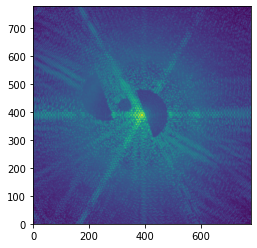

In [7]:
conf['f_app_amp'] = conf['dir_input'] + 'optics/app/METIS_IMG_M_amp.fits'
conf['f_app_phase'] = conf['dir_input'] + 'optics/app/METIS_IMG_M_phase.fits'
psf = heeps.wavefront.propagate(wf, onaxis=False, verbose=verbose, **conf)
psf_crop, fwhm, ap_flux = psf_template(psf)
ap_flux_OFF = ap_flux
peak_OFF = np.max(psf_crop)
print('off-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
psf = heeps.wavefront.propagate(wf, onaxis=True, verbose=verbose, **conf)
psf_crop, fwhm, ap_flux = psf_template(psf)
plt.imshow(np.log10(psf), origin='lower');
print('on-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
print('flux Strehl=%.2f%%, peak Strehl=%.2f%%'%(ap_flux/ap_flux_OFF*100, np.max(psf_crop)/peak_OFF*100))

### LMS

   2022-07-24 14:58:44, e2e simulation using 56 cores
   2022-07-24 14:59:00, completed in 15.32 seconds
off-axis PSF: fwhm=4.5pix, PSF flux=0.236, PSF max=0.020

   2022-07-24 14:59:05, e2e simulation using 56 cores
   2022-07-24 14:59:20, completed in 14.86 seconds
on-axis PSF: fwhm=4.5pix, PSF flux=0.154, PSF max=0.013

flux Strehl=65.46%, peak Strehl=63.78%


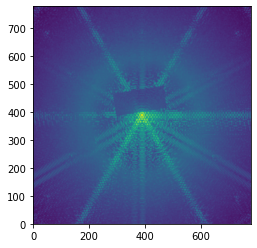

In [8]:
conf['f_app_amp'] = conf['dir_input'] + 'optics/app/METIS_LMS_M_amp.fits'
conf['f_app_phase'] = conf['dir_input'] + 'optics/app/METIS_LMS_M_phase.fits'
psf = heeps.wavefront.propagate(wf, onaxis=False, verbose=verbose, **conf)
psf_crop, fwhm, ap_flux = psf_template(psf)
ap_flux_OFF = ap_flux
peak_OFF = np.max(psf_crop)
print('off-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
psf = heeps.wavefront.propagate(wf, onaxis=True, verbose=verbose, **conf)
psf_crop, fwhm, ap_flux = psf_template(psf)
plt.imshow(np.log10(psf), origin='lower');
print('on-axis PSF: fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f\n'%(fwhm, ap_flux, np.max(psf_crop)))
print('flux Strehl=%.2f%%, peak Strehl=%.2f%%'%(ap_flux/ap_flux_OFF*100, np.max(psf_crop)/peak_OFF*100))